In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [3]:
df2 = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v2.xlsx', nrows=153)

In [4]:
df2.head()

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,0.019907,12.7,57074.685716,18.2,18.3,NaN,NaN,18.2
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,0.031642,20.2,45776.871746,22.4,22.3,NaN,NaN,22.3
4,East North Central Division,2010,18686,14.3,3221,12.4,21907,0.021907,14.0,45133.884500,15.6,15.6,NaN,NaN,15.6


In [6]:
df2[df2['division'].str.contains('Division')]

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.500000,705,2.700000,5249,0.005249,3.400000,58038.261498,4.70,4.70,NaN,NaN,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,0.014658,9.400000,56733.873756,13.50,13.60,NaN,NaN,13.60
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,0.021907,14.000000,45133.884500,15.60,15.60,NaN,NaN,15.60
5,West North Central Division,2010,8355,6.400000,1380,5.300000,9735,0.009735,6.200000,47230.832847,6.70,6.70,NaN,NaN,6.70
7,South Atlantic Division,2010,29203,22.400000,6973,26.800000,36176,0.036176,23.100000,45427.140521,17.80,17.90,NaN,NaN,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,South Atlantic Division,2020,28603,24.145499,8036,28.602954,36639,0.036639,25.000000,58724.964036,18.30,19.02,NaN,NaN,18.66
145,East South Central Division,2020,7680,6.483146,1719,6.118526,9399,0.009399,6.413248,49217.066650,5.78,6.27,NaN,NaN,6.02
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,0.022375,15.267202,60305.367844,12.83,13.33,NaN,NaN,10.08
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,0.012012,8.196184,57141.732470,8.42,7.43,NaN,NaN,7.93


In [10]:
df2_div = df2[df2['division'].str.contains('Division')]

In [11]:
df2_div.head(2)

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6


In [12]:
df2_div.loc[df2_div['Year(FY)'] == 2010]

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6
4,East North Central Division,2010,18686,14.3,3221,12.4,21907,0.021907,14.0,45133.884500,15.6,15.6,NaN,NaN,15.6
5,West North Central Division,2010,8355,6.4,1380,5.3,9735,0.009735,6.2,47230.832847,6.7,6.7,NaN,NaN,6.7
7,South Atlantic Division,2010,29203,22.4,6973,26.8,36176,0.036176,23.1,45427.140521,17.8,17.9,NaN,NaN,17.8
8,East South Central Division,2010,8251,6.3,1661,6.4,9912,0.009912,6.3,37669.166778,6.2,5.7,NaN,NaN,5.9
9,West South Central Division,2010,18047,13.9,3675,14.1,21722,0.021722,13.9,47357.037342,11.7,12.3,NaN,NaN,12.0
11,Mountain Division,2010,10683,8.2,2023,7.8,12706,0.012706,8.1,43800.012213,7.2,7.1,NaN,NaN,7.2
12,Pacific Division,2010,20281,15.6,3943,15.2,24224,0.024224,15.5,52101.402935,16.6,16.4,NaN,NaN,16.5


In [13]:
df2_div_2010 = df2_div.loc[df2_div['Year(FY)'] == 2010]

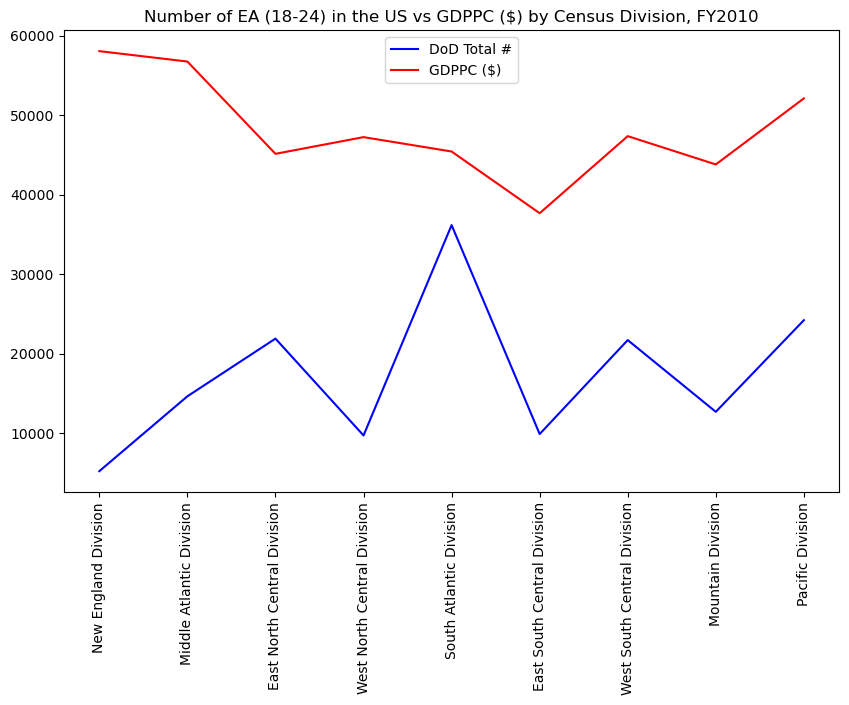

In [25]:
plt.figure(figsize=(10,6))

plt.plot(df2_div_2010['division'], df2_div_2010['DoD_Total'], label = 'DoD Total #', color = 'blue')
plt.plot(df2_div_2010['division'], df2_div_2010['GDP_Per_Capita'], label = 'GDPPC ($)', color = 'red')

#plt.ylim(100000, 900000)

plt.title('Number of EA (18-24) in the US vs GDPPC ($) by Census Division, FY2010')
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.show()

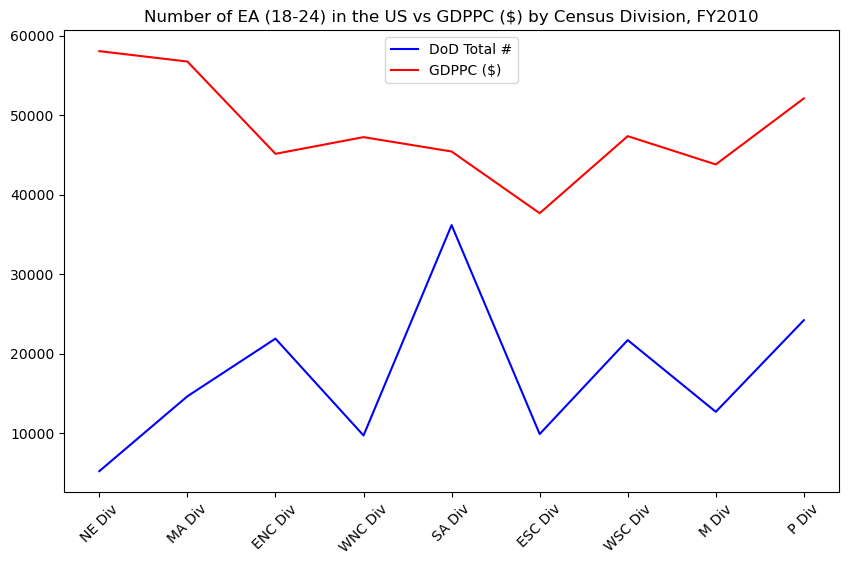

In [27]:
plt.figure(figsize=(10,6))
x = ['NE Div', 'MA Div', 'ENC Div', 'WNC Div', 'SA Div', 'ESC Div', 'WSC Div', 'M Div', 'P Div']
plt.plot(x, df2_div_2010['DoD_Total'], label = 'DoD Total #', color = 'blue')
plt.plot(x, df2_div_2010['GDP_Per_Capita'], label = 'GDPPC ($)', color = 'red')

#plt.ylim(100000, 900000)

plt.title('Number of EA (18-24) in the US vs GDPPC ($) by Census Division, FY2010')
plt.xticks(x, rotation=45)
plt.legend(loc='upper center')
plt.show()

In [30]:
import matplotlib.colors as mcolors

NameError: name 'y' is not defined

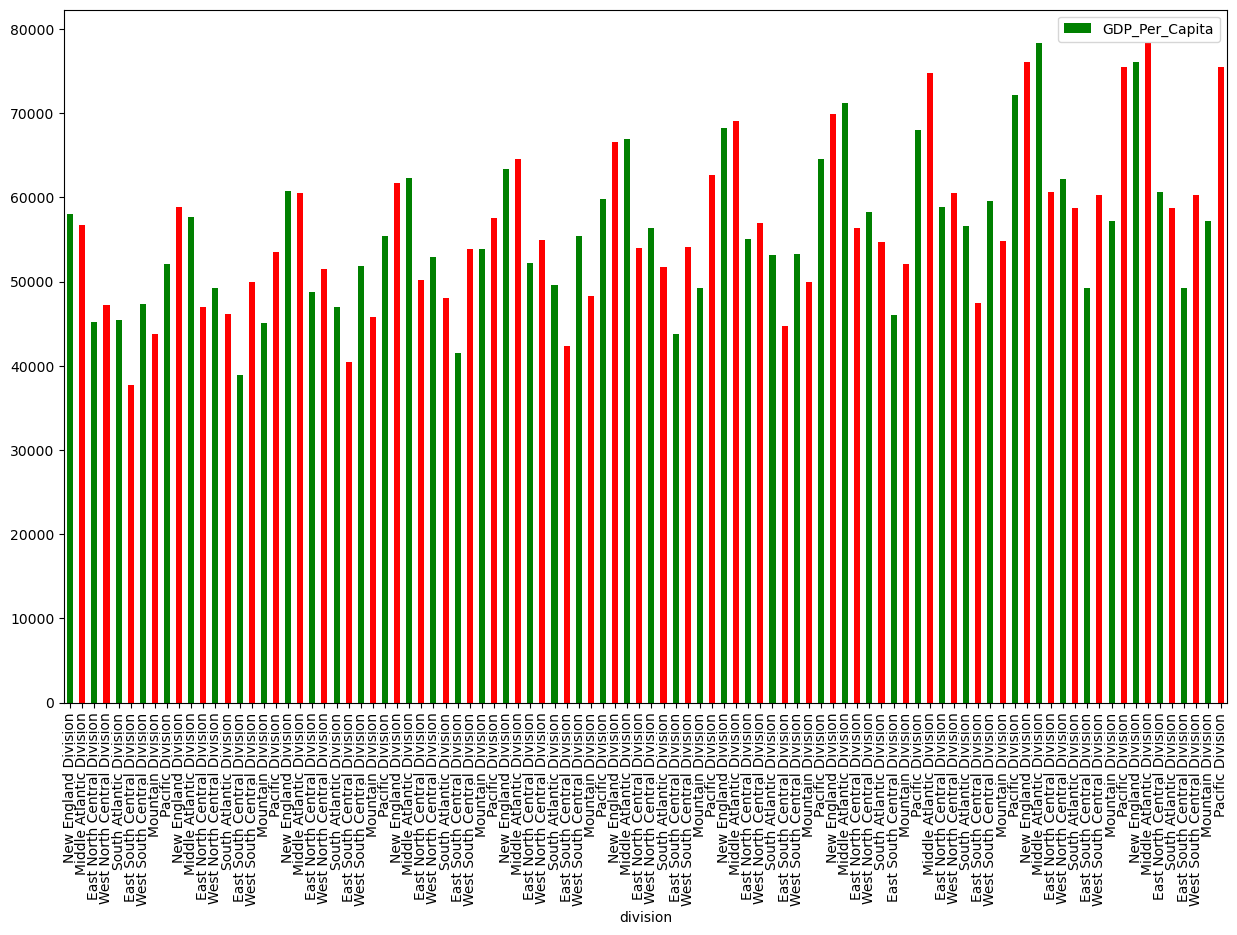

In [38]:

colors = ['green', 'red']
x = ['NE Div', 'MA Div', 'ENC Div', 'WNC Div', 'SA Div', 'ESC Div', 'WSC Div', 'M Div', 'P Div']
df2_div = pd.DataFrame(df2_div, columns=['division', 'DoD_Total', 'GDP_Per_Capita'])

df2_div.plot(x='division', y='GDP_Per_Capita', kind = 'bar', color = colors, figsize = (15,9))
#plt.bar(color=colors)
plt.bar(x,y, width = 0.05)
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('GDPPC ($)')
plt.title('GDPPC ($) by Census Division')
plt.show()      